# Graph stationarity

In this document we illustrate the concept of graph stationarity with concrete examples over synthetic and real-world data.

In [34]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sn

from scipy.linalg import eigh

### Synthetic data

In [9]:
nb_nodes = 30
cluster_nb = 3
mean_cluster_size = 12
inter_density = 0.05
intra_density = 0.85
graph_seed = 10

G = nx.gaussian_random_partition_graph(n=nb_nodes, s=mean_cluster_size, v=2*mean_cluster_size, p_in=intra_density, p_out=inter_density, seed=graph_seed)
coord = nx.spring_layout(G)

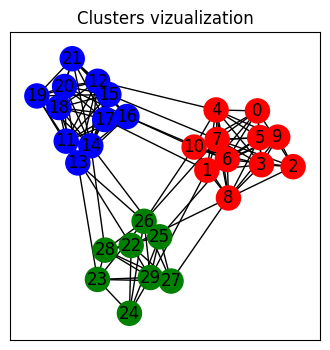

In [10]:
# Vizualization of the graph clusters
#####################################

clusters_seed = 20
clusters = nx.algorithms.community.louvain.louvain_communities(G, seed=clusters_seed)
colors_dct = {0: 'r', 1: 'b', 2: 'g'}
cluster_idx_arr = np.zeros((nb_nodes))

for cl_ind in range(len(clusters)):
    for node_ind in list(clusters[cl_ind]):
        cluster_idx_arr[node_ind] = cl_ind

colors_l = [colors_dct[cluster_idx_arr[node_ind]] for node_ind in range(nb_nodes)]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_title('Clusters vizualization')
nx.draw_networkx(G, pos= coord, with_labels=True, node_color=colors_l,  ax=ax)

Text(0.5, 0.98, 'Eigenvectors vizualization')

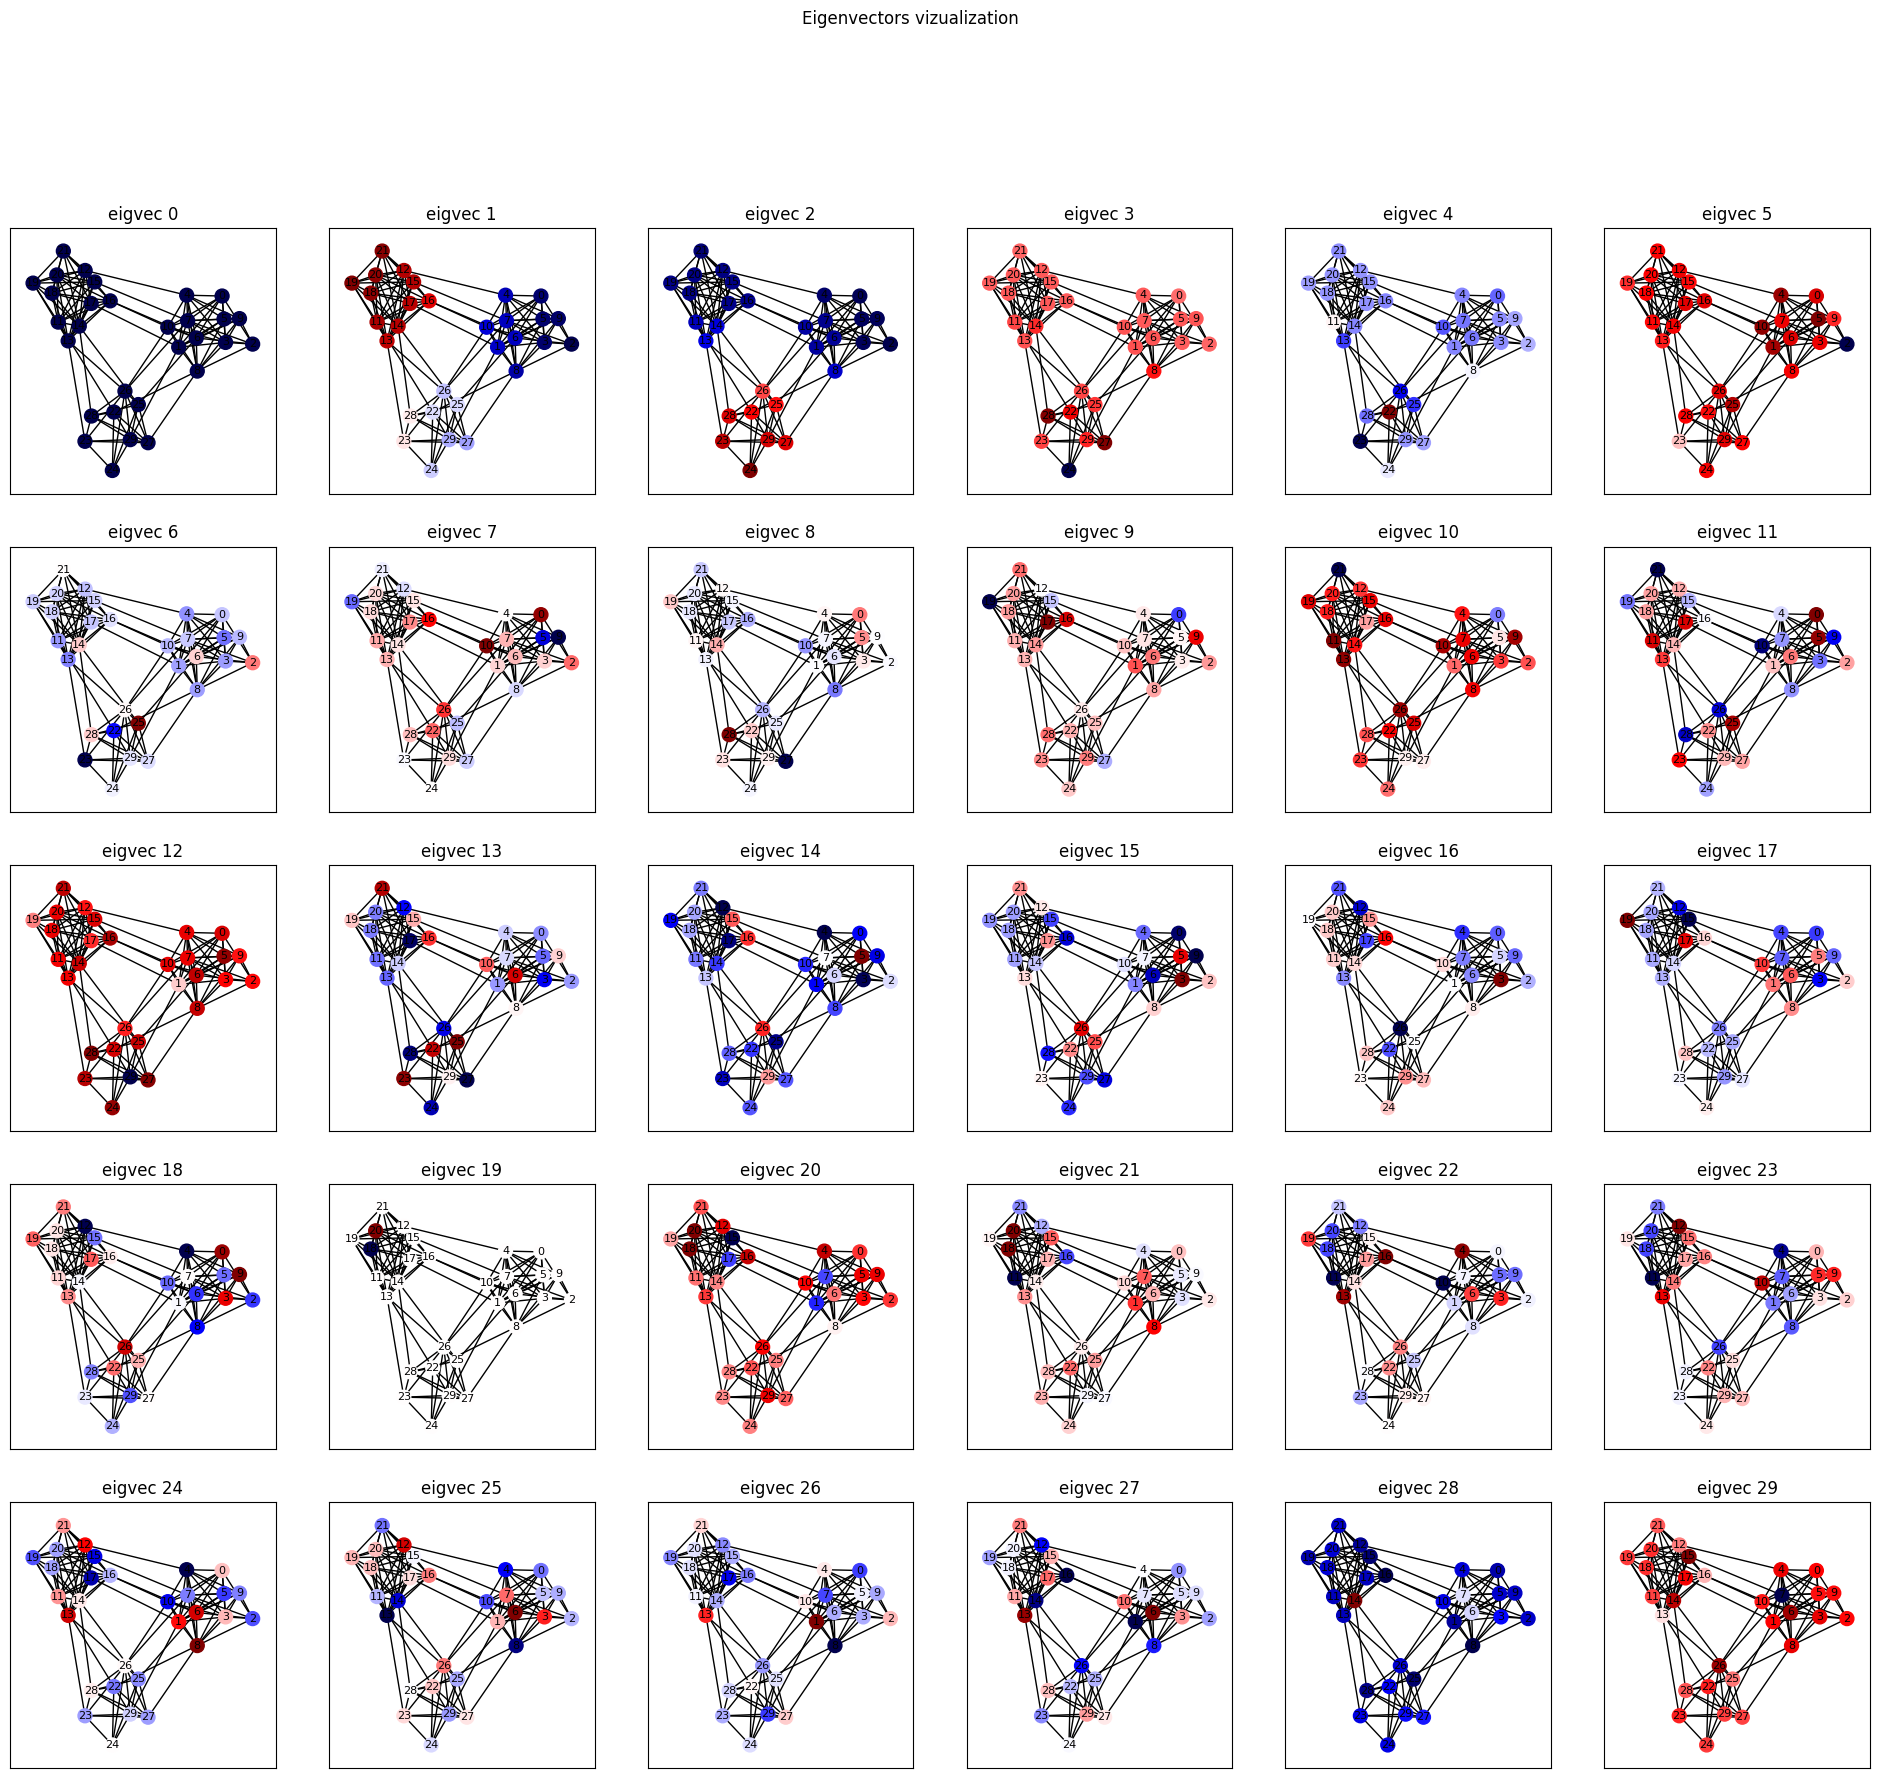

In [32]:
# Vizualization of the eigenvectors shapes
##########################################

###### NOTE:
# The eigh function from scipy stores eigvals and eigvects such that the eigenvector
# corresponding to eigenvalue i (eigval[i]) is the column eigvect[:, i]

eigvals, eigvects = eigh(nx.laplacian_matrix(G).toarray())

fig, axes = plt.subplots((nb_nodes//6), 6, figsize=(6*4, (nb_nodes//6)*4))
for id in range(nb_nodes):
    nx.draw_networkx(G, pos=coord, with_labels=True, node_color=np.round(eigvects[:, id], decimals=6), node_size=100, font_size=8, cmap='seismic', ax=axes[id//6, id%6])
    # nx.draw_networkx(G, pos=coord, with_labels=True, node_color=eigvects[:, id], node_size=100, font_size=8, cmap='seismic', ax=axes[id//6, id%6])
    axes[id//6, id%6].set_title(f'eigvec {id}')
fig.suptitle('Eigenvectors vizualization', verticalalignment='bottom')

We recall that if $y \in \mathbb{R}$ is a WS stationary signal over $G$, then its covariance matrix $C_y$ is co-diagonalizable with the combinatorial Laplacian $L$ of $G$. With the following decomposition of $L$:

$$ L = U \Lambda U^T $$

with $U = [U_1, \ldots, U_p]$ the eigenvectors of $L$, the above statement formally re-writes as:

$$ C_y =  U \Theta U^T =  \sum_{k=1}^p \theta_k U_k U_k^T $$

In other words, one should see the covariance matrix of any WS stationary graph signal $y$ as a linear combination of the rank $1$ matrices given by the $U_k U_k^T$.

In [37]:
a = np.array([1, 2, 3])
b = a.T[:, None] * a[None, :]

In [38]:
b

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

/tmp/ipykernel_38690/3923093284.py:2: RuntimeWarning: invalid value encountered in divide
  norm = lambda arr: (arr - np.min(arr))/(np.max(arr) - np.min(arr))
/home/matencioeve/dev/Borelli_X_RTE/graph-signals-change-point-detection/.venv/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/matencioeve/dev/Borelli_X_RTE/graph-signals-change-point-detection/.venv/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


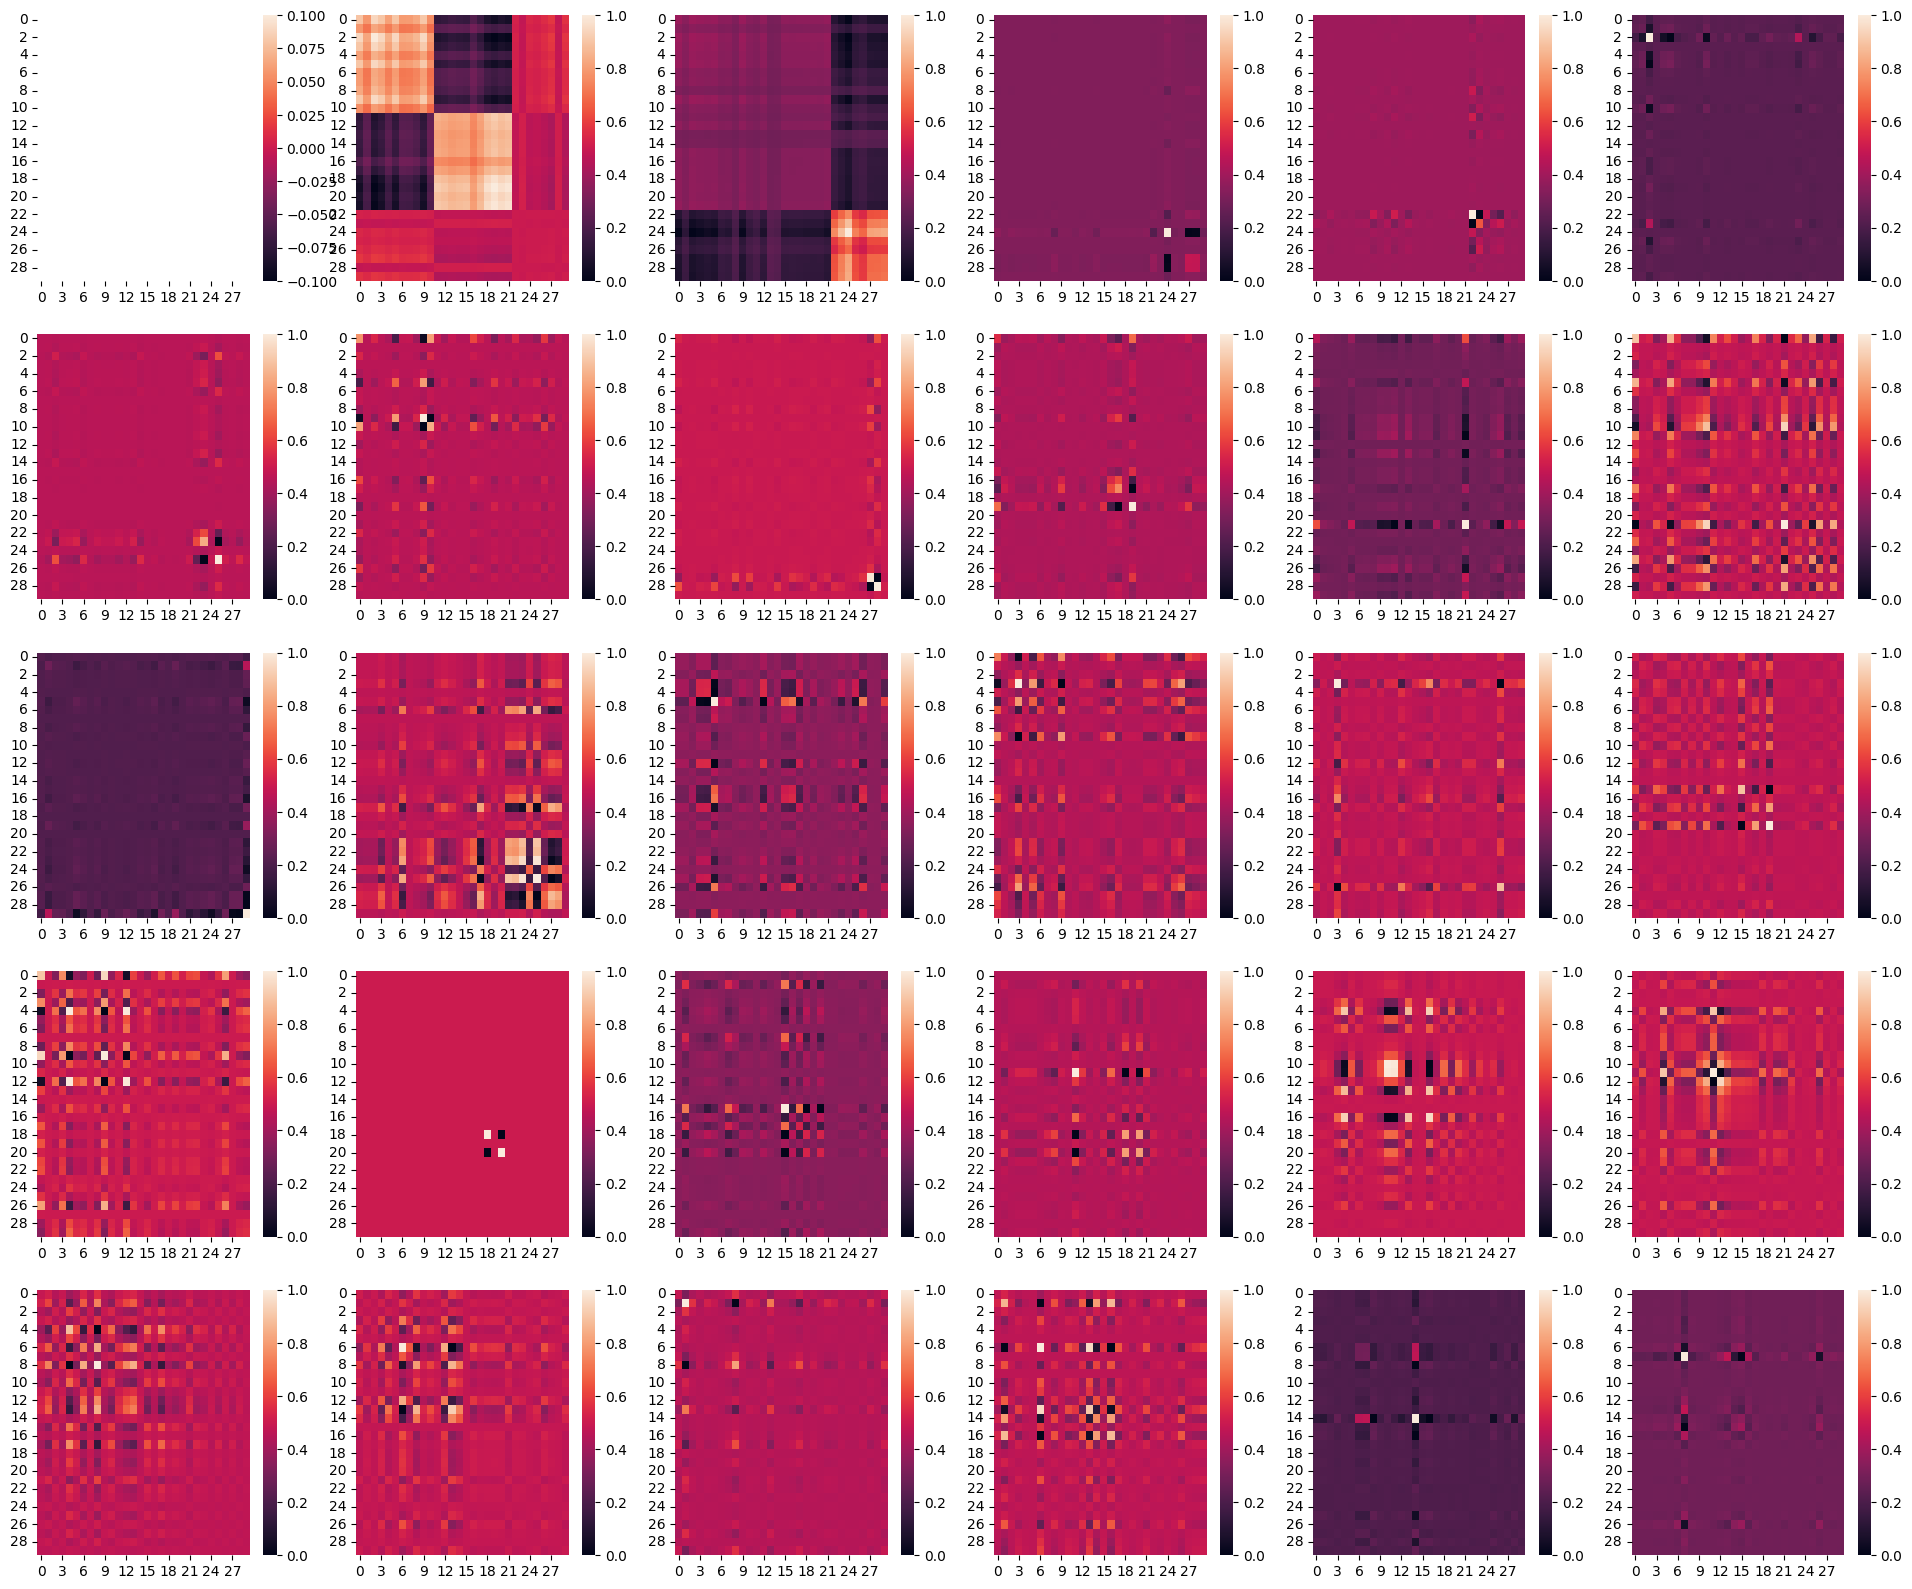

In [49]:
eigvals, eigvects = eigh(nx.laplacian_matrix(G).toarray())
norm = lambda arr: (arr - np.min(arr))/(np.max(arr) - np.min(arr))

fig, axes = plt.subplots((nb_nodes//6), 6, figsize=(6*4, (nb_nodes//6)*4))
for i in range(nb_nodes):
    # axes[i//6, i%6].imshow(np.round(eigvects[:, i].T[:, None] * eigvects[:, i][None, :], decimals=6))
    _ = sn.heatmap(norm(np.round(eigvects[:, i].T[:, None] * eigvects[:, i][None, :], decimals=6)), ax=axes[i//6, i%6],)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 8))

tot_sum_cov = 
for 